# DOJO ML - 3rd Place solution
## team : curiosos_do_ml 
## Mateus C. Pedrino - Bruno Rasteiro - HelloToMyLittleFriend

## Exploratory analysis

You guys will realize that this part is very repetitive and doesn't use what is already done in the previous section. This happend because these notebooks were done simultaneously. Anyway, the aim of this part is to have some insights from the available data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
error=pd.read_csv('erros.csv',header=(0))
error.head()

,data,maquina,erro
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [3]:
error_dum=pd.concat([error[['data','maquina']],pd.get_dummies(error['erro'])],axis=1)
error_dum['data']=pd.to_datetime(error_dum['data'])
error_dum.head()

,data,maquina,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0


In [4]:
print('Shape of the above table : ',error_dum.shape)
print('Possible errors : ',np.unique(error['erro']))

Shape of the above table :  (3919, 7)
Possible errors :  ['error1' 'error2' 'error3' 'error4' 'error5']


In [5]:
# Split into date and time
error_dum['dia']=error_dum['data'].dt.date
error_dum['horario']=error_dum['data'].dt.time
error_dum=error_dum.drop('data',axis=1)
cols=list(error_dum.columns)
# Let date and time as first columns
error_dum=error_dum[cols[-2:]+cols[0:-2]]
error_dum.head()

,dia,horario,maquina,error1,error2,error3,error4,error5
0,2015-01-03,07:00:00,1,1,0,0,0,0
1,2015-01-03,20:00:00,1,0,0,1,0,0
2,2015-01-04,06:00:00,1,0,0,0,0,1
3,2015-01-10,15:00:00,1,0,0,0,1,0
4,2015-01-22,10:00:00,1,0,0,0,1,0


In [6]:
error_dum=error_dum.sort_values(['dia','horario'])
error_dum.head(10)

,dia,horario,maquina,error1,error2,error3,error4,error5
919,2015-01-01,06:00:00,24,1,0,0,0,0
2792,2015-01-01,06:00:00,73,0,0,0,1,0
3107,2015-01-01,06:00:00,81,1,0,0,0,0
1624,2015-01-01,07:00:00,43,0,0,1,0,0
482,2015-01-01,08:00:00,14,0,0,0,1,0
2905,2015-01-01,08:00:00,76,0,0,0,0,1
1586,2015-01-01,10:00:00,42,0,1,0,0,0
2750,2015-01-01,12:00:00,72,0,1,0,0,0
2867,2015-01-01,12:00:00,75,1,0,0,0,0
3744,2015-01-01,12:00:00,97,0,0,1,0,0


In [7]:
# Number of errors per day in each machine
obj=error_dum.groupby(by=['maquina','dia'], as_index=False)

In [8]:
error_dum_dia=obj.sum()
error_dum_dia.head(10)

,maquina,dia,error1,error2,error3,error4,error5
0,1,2015-01-03,1,0,1,0,0
1,1,2015-01-04,0,0,0,0,1
2,1,2015-01-10,0,0,0,1,0
3,1,2015-01-22,0,0,0,1,0
4,1,2015-01-25,0,0,0,1,0
5,1,2015-01-27,1,0,0,0,0
6,1,2015-03-03,0,1,0,0,0
7,1,2015-03-05,1,0,0,0,0
8,1,2015-03-20,1,0,0,0,0
9,1,2015-03-26,0,1,0,0,0


In [9]:
# Amount of errors by machine within the given time period
qte_total_erros=error_dum_dia.drop('dia', axis=1)
obj=qte_total_erros.groupby(by=['maquina'], as_index=False)
qte_total_erros=obj.sum()
qte_total_erros.head()

,maquina,error1,error2,error3,error4,error5
0,1,11,6,9,5,4
1,2,5,10,5,5,3
2,3,11,10,8,8,2
3,4,10,11,8,2,0
4,5,14,8,7,6,3


In [10]:
por_erro=qte_total_erros.drop('maquina', axis=1).sum()
por_erro=por_erro/por_erro.sum()
por_erro

error1    0.257719
error2    0.252105
error3    0.213830
error4    0.185507
error5    0.090839
dtype: float64

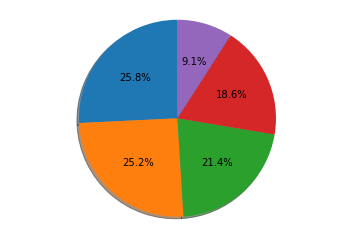

In [13]:
fig1, ax1 = plt.subplots()


ax1.pie(por_erro, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [19]:
qte_total_erros.shape

(100, 6)

In [20]:
train=pd.read_csv('treino.csv',header=(0))
train=train.drop('index', axis=1)
train=train.sort_values(['maquina','data'])[['maquina','data','falha']]
train.head()

,maquina,data,falha
22293,1,2015-01-01,ok
602,1,2015-01-04,ok
2544,1,2015-01-06,ok
11899,1,2015-01-07,ok
13940,1,2015-01-08,ok


In [21]:
train.shape

(25650, 3)

In [22]:
train_dummy=pd.get_dummies(train['falha'])
train_dummy=pd.concat([train.drop(['falha','data'], axis=1), train_dummy], axis=1)
train_dummy.head()

,maquina,comp1,comp2,comp3,comp4,ok
22293,1,0,0,0,0,1
602,1,0,0,0,0,1
2544,1,0,0,0,0,1
11899,1,0,0,0,0,1
13940,1,0,0,0,0,1


In [23]:
# Amount of each failure for each of the machines in the given time period
obj=train_dummy.groupby(['maquina'], as_index=False)

In [24]:
train_dummy_sum=obj.sum()
train_dummy_sum.head()

,maquina,comp1,comp2,comp3,comp4,ok
0,1,1.0,1.0,0.0,3.0,247.0
1,2,0.0,2.0,0.0,0.0,261.0
2,3,1.0,3.0,0.0,0.0,248.0
3,4,2.0,3.0,0.0,0.0,248.0
4,5,2.0,3.0,0.0,0.0,245.0


In [25]:
train_dummy_sum.shape

(100, 6)

In [26]:
por_falha=train_dummy_sum.drop('maquina', axis=1).sum()
por_falha=por_falha/por_falha.sum()
por_falha

comp1    0.005263
comp2    0.007057
comp3    0.003587
comp4    0.004873
ok       0.979220
dtype: float64

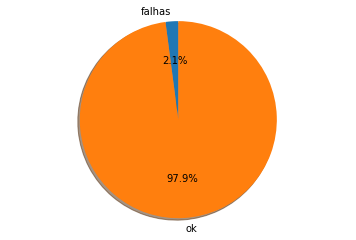

In [33]:
fig1, ax1 = plt.subplots()
ax1.pie([1 - por_falha['ok'], por_falha['ok']], labels=['falhas', 'ok'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [34]:
machines=pd.read_csv('maquinas.csv',header=(0))
machines=pd.concat([machines[['maquina','idade']],pd.get_dummies(machines['modelo'])],axis=1)
machines.head()

,maquina,idade,model1,model2,model3,model4
0,1,18,0,0,1,0
1,2,7,0,0,0,1
2,3,8,0,0,1,0
3,4,7,0,0,1,0
4,5,2,0,0,1,0


In [35]:
machines.shape

(100, 6)

In [36]:
# Gather all information obtained with machines in the given time period together
infos_maquinas=pd.concat([machines, qte_total_erros.drop('maquina', axis=1),\
                         train_dummy_sum.drop('maquina', axis=1)], axis=1)
infos_maquinas.head()

,maquina,idade,model1,model2,model3,model4,error1,error2,error3,error4,error5,comp1,comp2,comp3,comp4,ok
0,1,18,0,0,1,0,11,6,9,5,4,1.0,1.0,0.0,3.0,247.0
1,2,7,0,0,0,1,5,10,5,5,3,0.0,2.0,0.0,0.0,261.0
2,3,8,0,0,1,0,11,10,8,8,2,1.0,3.0,0.0,0.0,248.0
3,4,7,0,0,1,0,10,11,8,2,0,2.0,3.0,0.0,0.0,248.0
4,5,2,0,0,1,0,14,8,7,6,3,2.0,3.0,0.0,0.0,245.0


In [37]:
infos_maquinas.shape

(100, 16)

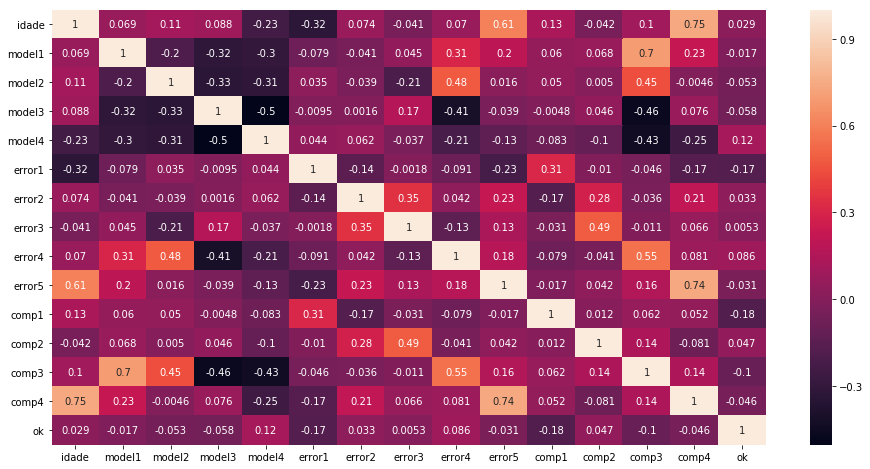

In [38]:
# Correlation matrix
import seaborn as sns

cormatrix=infos_maquinas.drop('maquina', axis=1).corr()
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(cormatrix, annot=True ,square=False)
plt.show()

In [22]:
# Sensors
infos=pd.read_csv('info_uso.csv',header=(0))
infos.head()

,data,maquina,voltagem,rotacao,pressao,vibracao
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [23]:
# Split into date and time
infos['data']=pd.to_datetime(infos['data'])
infos['dia']=infos['data'].dt.date
infos['horario']=infos['data'].dt.time
infos = infos.drop('data', axis=1)
# Reorder columns
cols=list(infos.columns)
cols=[cols[0]]+cols[-2:]+cols[1:-2]
infos=infos[cols]
infos.head()

,maquina,dia,horario,voltagem,rotacao,pressao,vibracao
0,1,2015-01-01,06:00:00,176.217853,418.504078,113.077935,45.087686
1,1,2015-01-01,07:00:00,162.879223,402.747490,95.460525,43.413973
2,1,2015-01-01,08:00:00,170.989902,527.349825,75.237905,34.178847
3,1,2015-01-01,09:00:00,162.462833,346.149335,109.248561,41.122144
4,1,2015-01-01,10:00:00,157.610021,435.376873,111.886648,25.990511


In [24]:
infos=infos.rename(index=str, columns={"dia": "data"})
infos.head()

,maquina,data,horario,voltagem,rotacao,pressao,vibracao
0,1,2015-01-01,06:00:00,176.217853,418.504078,113.077935,45.087686
1,1,2015-01-01,07:00:00,162.879223,402.747490,95.460525,43.413973
2,1,2015-01-01,08:00:00,170.989902,527.349825,75.237905,34.178847
3,1,2015-01-01,09:00:00,162.462833,346.149335,109.248561,41.122144
4,1,2015-01-01,10:00:00,157.610021,435.376873,111.886648,25.990511


In [25]:
# group by
obj=infos.drop('horario',axis=1).groupby(['maquina','data'], as_index=False)
infos_media=obj.mean()
infos_media.head()

,maquina,data,voltagem,rotacao,pressao,vibracao
0,1,2015-01-01,167.576533,440.515328,98.522345,40.049623
1,1,2015-01-02,169.795758,446.832666,98.454608,39.271645
2,1,2015-01-03,171.862244,459.204742,97.998233,48.074091
3,1,2015-01-04,174.792428,448.743201,101.452266,52.190268
4,1,2015-01-05,171.018408,454.822750,102.363114,43.330311


In [26]:
train.head()

,maquina,data,falha
22293,1,2015-01-01,ok
602,1,2015-01-04,ok
2544,1,2015-01-06,ok
11899,1,2015-01-07,ok
13940,1,2015-01-08,ok


In [27]:
train.shape

(25650, 3)

In [28]:
infos_media['data']=pd.to_datetime(infos_media['data'])
train['data']=pd.to_datetime(train['data'])

In [29]:
# Group by day calculating average of parameters within that day
merge=train.merge(infos_media, on=['maquina', 'data'])

In [30]:
merge.head()

,maquina,data,falha,voltagem,rotacao,pressao,vibracao
0,1,2015-01-01,ok,167.576533,440.515328,98.522345,40.049623
1,1,2015-01-04,ok,174.792428,448.743201,101.452266,52.190268
2,1,2015-01-06,ok,171.025033,454.614348,102.377665,41.506930
3,1,2015-01-07,ok,174.139410,444.337772,96.674842,41.702771
4,1,2015-01-08,ok,172.135931,446.126781,102.097039,39.281983


In [32]:
merge.shape # This, all train dates are inside infos_media dates

(25650, 7)

In [46]:
# Split into input and output
Y = np.array(merge['falha'], dtype=str)
X = np.array(merge.drop(['falha','data'], axis=1))